In [60]:
import cv2 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras import models


In [2]:
#setting dataset address
image_directory = 'dataset/'

In [3]:
#initialize 
dataset=[]
label=[]

In [4]:
#initialize data input size for model training
INPUT_SIZE = 64

In [5]:
#setting no tumor address
no_tumor_images=os.listdir(image_directory+ 'no')

In [6]:
#setting yes tumor address
yes_tumor_images=os.listdir(image_directory+ 'yes')

In [7]:
#confirming all photos are of type jpg
path = 'no0.jpg'
print(path.split('.')[1])

#loop to organize no_tumor_images
for i , image_name in enumerate(no_tumor_images): #for each img in no_tumor
    
    if(image_name.split('.')[1]=='jpg'): #check if img is of type jpg
        
        image=cv2.imread(image_directory+'no/'+image_name) #retrieve image
       
        #convert image read by OpenCV (which is a NumPy array) to a PIL Image object in RGB mode
        image = Image.fromarray(image, 'RGB')
        
        image = image.resize((INPUT_SIZE,INPUT_SIZE)) #resize to 64 by 64
        
        dataset.append(np.array(image)) #append image to dataset as np array
        label.append(0) #append to label set as negative (0)

jpg


In [8]:
#loop to organize yes_tumor_images
for i , image_name in enumerate(yes_tumor_images): #for each img in no_tumor
    
    if(image_name.split('.')[1]=='jpg'): #check if img is of type jpg
        
        image=cv2.imread(image_directory+'yes/'+image_name) #retrieve image
       
        #convert image read by OpenCV (which is a NumPy array) to a PIL Image object in RGB mode
        image = Image.fromarray(image, 'RGB')
        
        image = image.resize((INPUT_SIZE,INPUT_SIZE)) #resize to 64 by 64
        
        dataset.append(np.array(image)) #append image to dataset as np array
        label.append(1) #append to label set as positive (1)

In [9]:
print(dataset[:2])

[array([[[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       ...,

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]]], dtype=uint8), array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
 

In [10]:
print(label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
print(len(label))

3000


In [12]:
print(len(dataset))

3000


In [13]:
dataset = np.array(dataset)
label = np.array(label)

In [14]:
#data splitting: 80/20 train test split

x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state = 0)

In [15]:
print(x_train.shape) #2400 images, 64x64, 3 RBG channels

(2400, 64, 64, 3)


In [16]:
print(y_train.shape)

(2400,)


In [17]:
print(x_test.shape) #600 images, 64x64, 3 RBG channels
print(y_test.shape)

(600, 64, 64, 3)
(600,)


In [18]:
#Normalizing data

x_train = normalize(x_train, axis = 1)
x_test = normalize(x_test, axis = 1)

In [19]:
#Model Building
#sequential model

model = Sequential() #initialize model type

#add first layer as conv2d (filter,kernelsize, input shape = 64x64x3
model.add(Conv2D(32, (3,3), input_shape = (INPUT_SIZE, INPUT_SIZE, 3)))

#activation function
model.add(Activation('relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', name='last_conv_layer'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#flatten 
model.add(Flatten())

#dense layer
model.add(Dense(64))
#activation function
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1)) #1 because binary classification, 2 for categorical cross entropy
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])






In [20]:
model.fit(
    x_train, y_train,
    batch_size = 16, 
    verbose = 1, 
    epochs = 10,
    validation_data = (x_test,y_test),
    shuffle=False)



Epoch 1/10
150/150 [==============================] - 2s 11ms/step - loss: 0.5439 - accuracy: 0.7283 - val_loss: 0.4377 - val_accuracy: 0.8000
Epoch 2/10
150/150 [==============================] - 2s 10ms/step - loss: 0.3877 - accuracy: 0.8300 - val_loss: 0.3413 - val_accuracy: 0.8483
Epoch 3/10
150/150 [==============================] - 2s 11ms/step - loss: 0.3150 - accuracy: 0.8683 - val_loss: 0.2915 - val_accuracy: 0.8667
Epoch 4/10
150/150 [==============================] - 2s 11ms/step - loss: 0.2407 - accuracy: 0.9096 - val_loss: 0.2417 - val_accuracy: 0.9017
Epoch 5/10
150/150 [==============================] - 2s 11ms/step - loss: 0.1571 - accuracy: 0.9467 - val_loss: 0.1638 - val_accuracy: 0.9467
Epoch 6/10
150/150 [==============================] - 2s 11ms/step - loss: 0.1086 - accuracy: 0.9621 - val_loss: 0.1566 - val_accuracy: 0.9367
Epoch 7/10
150/150 [==============================] - 2s 11ms/step - loss: 0.0873 - accuracy: 0.9683 - val_loss: 0.2055 - val_accuracy: 0.9267

In [41]:
model.save('BrainTumor10Epochs.keras')


In [22]:

def generate_saliency_map(model, input_image):
    """
    Generates a saliency map for a given input image and model using tf.GradientTape.
    
    :param model: Trained Keras model
    :param input_image: Input image for which the saliency map is to be generated
    :return: Saliency map
    """
    # Convert the image to array and expand dimensions to match the model's input shape
    input_image = np.expand_dims(input_image, axis=0)
    input_image = tf.convert_to_tensor(input_image, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        # Watch the input tensor
        tape.watch(input_image)
        
        # Get model predictions for the input image
        predictions = model(input_image)
        
        # Assume it’s a binary classification and get the scalar output
        output = predictions[0][0] if predictions.shape[1] == 1 else tf.reduce_max(predictions, axis=1)[0]
    
    # Compute the gradient of the output with respect to the input
    grads = tape.gradient(output, input_image)
    
    # Normalize the saliency map
    saliency_map = np.abs(grads.numpy())
    saliency_map = saliency_map - np.min(saliency_map)
    saliency_map = saliency_map / np.max(saliency_map)
    
    return saliency_map[0]



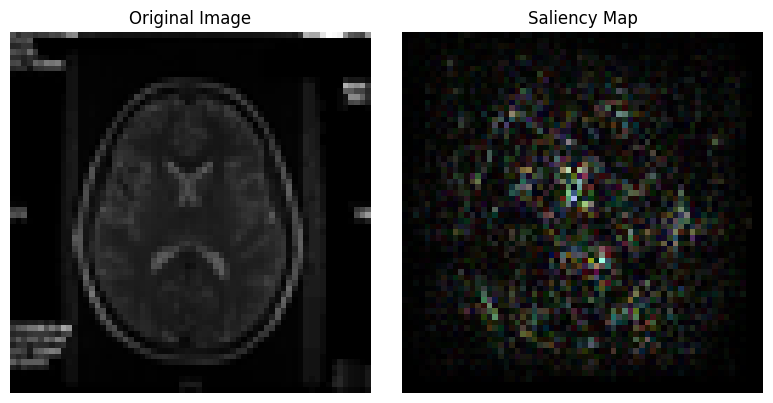

In [23]:
# Generate saliency map for a sample input image from the test set
sample_image = x_test[1]  
saliency_map = generate_saliency_map(model, sample_image)

# Display the original image and the saliency map
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(sample_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Saliency Map')
plt.imshow(np.squeeze(saliency_map), cmap='hot')
plt.axis('off')

plt.tight_layout()
plt.show()



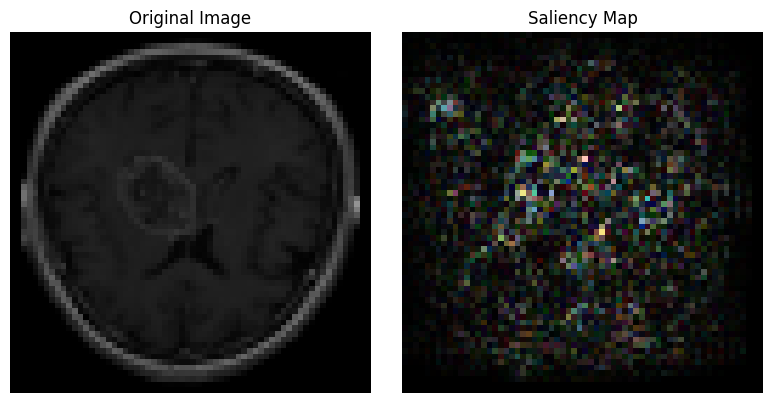

In [24]:
# Generate saliency map for a sample input image from the test set
sample_image = x_test[500]  
saliency_map = generate_saliency_map(model, sample_image)

# Display the original image and the saliency map
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(sample_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Saliency Map')
plt.imshow(np.squeeze(saliency_map), cmap='hot')
plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:
#saliency images are quite distorted 

In [26]:
def generate_saliency_map(model, input_image):
    input_image = np.expand_dims(input_image, axis=0)
    input_image = tf.convert_to_tensor(input_image, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        predictions = model(input_image)
        output = predictions[0][0] if predictions.shape[1] == 1 else tf.reduce_max(predictions, axis=1)[0]
    
    grads = tape.gradient(output, input_image)
    saliency_map = np.abs(grads.numpy())
    
    # Properly normalize the saliency map
    saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))
    
    return saliency_map[0]

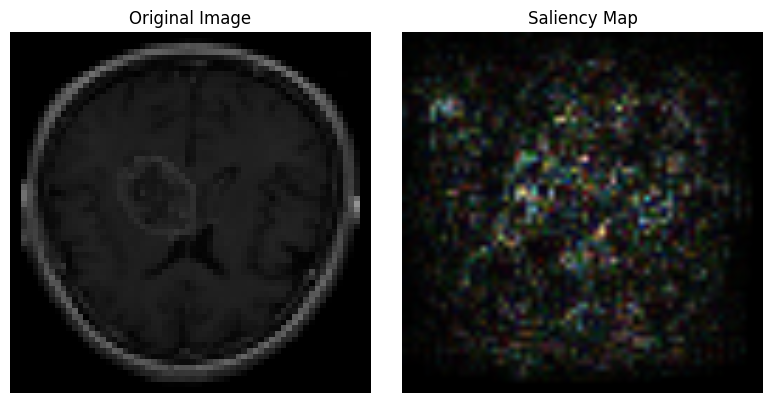

In [27]:
sample_image = x_test[500]  
saliency_map = generate_saliency_map(model, sample_image)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(sample_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Saliency Map')
plt.imshow(np.squeeze(saliency_map), cmap='hot', interpolation='bilinear')  # Use bilinear interpolation for visualization
plt.axis('off')

plt.tight_layout()
plt.show()

In [52]:
#instead use GRAD-CAM method 

def generate_grad_cam(model, input_image, layer_name):
    input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension
    input_image = tf.convert_to_tensor(input_image, dtype=tf.float32)
    
    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        conv_outputs, predictions = grad_model(input_image)
        
    grads = tape.gradient(predictions, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    grad_cam = np.zeros(conv_outputs.shape[1:3], dtype=np.float32)  # Initialize to the spatial dimensions
    
    for i, w in enumerate(pooled_grads.numpy()):
        grad_cam += w * np.mean(conv_outputs[0, :, :, i], axis=-1)  # Average across the channels
    
    grad_cam = np.maximum(grad_cam, 0)
    grad_cam = grad_cam / np.max(grad_cam)
    grad_cam = cv2.resize(grad_cam, (input_image.shape[2], input_image.shape[1]))
    
    return grad_cam



In [42]:
import tensorflow as tf

model_directory = 'BrainTumor10Epochs.keras'
model = tf.keras.models.load_model(model_directory, compile=False)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


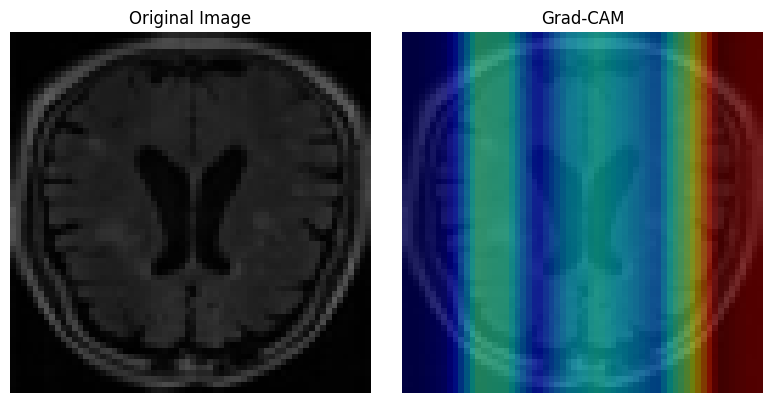

In [53]:
# Specify the name of the layer for which Grad-CAM is to be computed
layer_name = 'last_conv_layer' 

model1 = tf.keras.models.load_model(model_directory, compile=False)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Generate Grad-CAM map for a sample input image from the test set
sample_image = x_test[0]  
grad_cam = generate_grad_cam(model1, sample_image, layer_name)

# Display the original image and the Grad-CAM map
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(sample_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(sample_image)
plt.imshow(grad_cam, cmap='jet', alpha=0.5)  # Overlaying the Grad-CAM map on the original image
plt.axis('off')

plt.tight_layout()
plt.show()

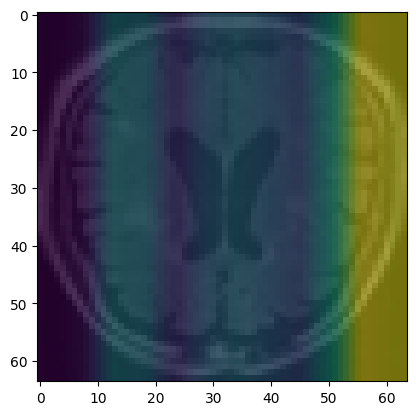

In [54]:
# Generate Grad-CAM
grad_cam = generate_grad_cam(model1, sample_image, layer_name)

# Normalize the Grad-CAM
grad_cam = (grad_cam - np.min(grad_cam)) / (np.max(grad_cam) - np.min(grad_cam))

# Resize Grad-CAM to match the original image size
grad_cam_resized = cv2.resize(grad_cam, (sample_image.shape[1], sample_image.shape[0]))

# Visualize the original image
plt.imshow(sample_image)

# Overlay the Grad-CAM
plt.imshow(grad_cam_resized, cmap='viridis', alpha=0.5)  # You can also try 'plasma' colormap
plt.show()


In [55]:


# Replace 'simple_model' with your actual model variable name
# Replace 'last_conv_layer' with the name of your model's last convolutional layer
layer_name = 'last_conv_layer'

# Get the convolutional layer output and model output
conv_layer = model.get_layer(layer_name)
model_output = model.output[:, 0] if len(model.output.shape) == 2 else model.output




In [57]:

# Get the last convolutional layer
last_conv_layer = model.get_layer(layer_name)


In [61]:
# Create a model that maps the input image to the activations of the last conv layer
last_conv_layer_model = models.Model(model.inputs, last_conv_layer.output)


In [67]:
from keras.layers import Dense

# Correctly build the classifier model
correct_input_shape = last_conv_layer.output.shape[1:]

# Create a model that maps the activations of the last conv layer to the final model predictions
classifier_input = tf.keras.Input(shape=correct_input_shape)
x = classifier_input

# Initialize the flag for the Flatten layer
is_flatten_reached = False

# Loop over each layer and rebuild the model from the Flatten layer onwards
for layer in model.layers:
    if layer.name == 'flatten':
        is_flatten_reached = True
        x = tf.keras.layers.Flatten()(x)  # Add a new Flatten layer with the correct input shape
        continue  # Skip the original Flatten layer in the model
    if is_flatten_reached:
        if layer.name == 'dense':
            # Create a new Dense layer with the correct input shape
            x = Dense(layer.units, activation=layer.activation, name=layer.name)(x)
        else:
            x = layer(x)  # Add the remaining layers as they are

# Create the new classifier model
classifier_model = tf.keras.Model(classifier_input, x)



In [68]:
import tensorflow as tf

# Define a model that returns the activations from the last convolution layer and the output of the model
grad_model = tf.keras.models.Model(
    [model.inputs], 
    [model.get_layer('last_conv_layer').output, model.output]
)


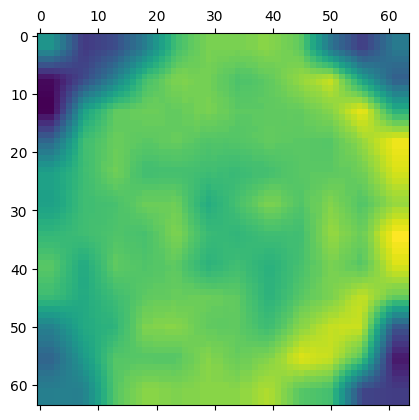

In [71]:
import cv2
import numpy as np

# Get the sample image
sample_image = x_test[500]  # Please replace with an appropriate image from your dataset
sample_image = np.expand_dims(sample_image, axis=0)  # Expand dimensions to represent a batch of size 1

# Get the gradients and predictions
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(sample_image)
    loss = predictions[:, 0]  # assuming your model has a single output
    
# Get the gradients of the loss with respect to the conv_outputs
output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

# Average the gradients spatially
weights = tf.reduce_mean(grads, axis=(0, 1))

# Build a weighted map of filters and upscale it to the input image size
cam = np.ones(output.shape[0:2], dtype=np.float32)
for i, w in enumerate(weights):
    cam += w * output[:, :, i]
    
# Resize heatmap to be the same size as the input image
heatmap = cv2.resize(cam.numpy(), (sample_image.shape[1], sample_image.shape[2]))

# ReLU the heatmap
heatmap = np.maximum(heatmap, 0)

# Normalize the heatmap
heatmap /= np.max(heatmap)

# Visualize the heatmap
plt.matshow(heatmap)
plt.show()


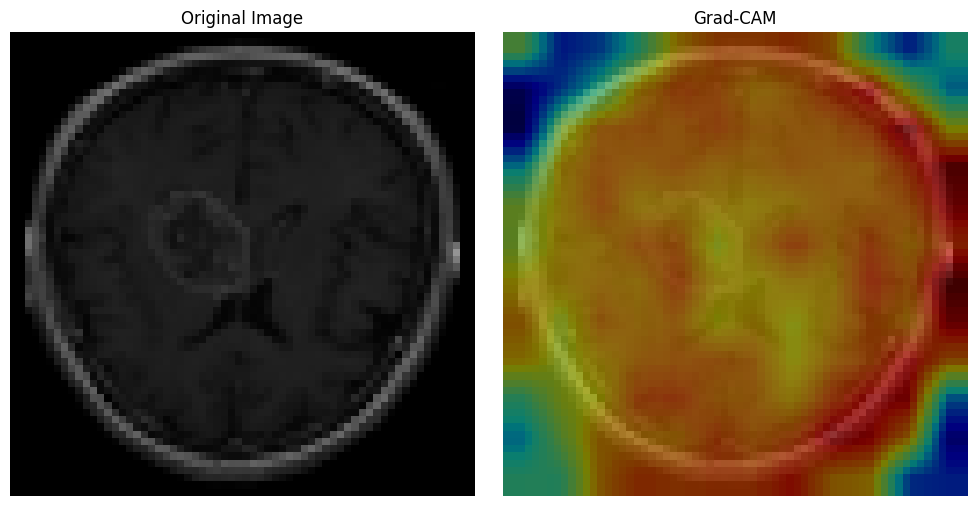

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Display the original image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sample_image[0])
plt.title('Original Image')
plt.axis('off')

# Overlay the heatmap on the original image
plt.subplot(1,2,2)
plt.imshow(sample_image[0])
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlaying the heatmap
plt.title('Grad-CAM')
plt.axis('off')

plt.tight_layout()
plt.show()
